In [258]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [259]:
data = pd.read_csv("agaricus-lepiota-data.csv")
df = pd.DataFrame(data=data)
df.rename(columns={'p': 'poisonous', 'x': 'cap-shape', 's': 'cap-surface', 'n': 'cap-color', 't': 'bruises?', 'p.1': 'odor', 'f': 'gill-attachment', 'c': 'gill-spacing', 'n.1': 'gill-size', 'k': 'gill-color', 'e': 'stalk-shape', 'e.1': 'stalk-root', 's.1': 'stalk-surface-above-ring', 's.2': 'stalk-surface-below-ring', 'w': 'stalk-color-above-ring', 'w.1': 'stalk-color-below-ring', 'p.2': 'veil-type', 'w.2': 'veil-color', 'o': 'ring-number', 'p.3': 'ring-type', 'k.1': 'spore-print-color', 's.3': 'population', 'u': 'habitat'}, inplace=True)
list(df)

['poisonous',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises?',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [260]:
df

,poisonous,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
5,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
6,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
7,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
8,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m
9,e,x,y,y,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,g


/home/david/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


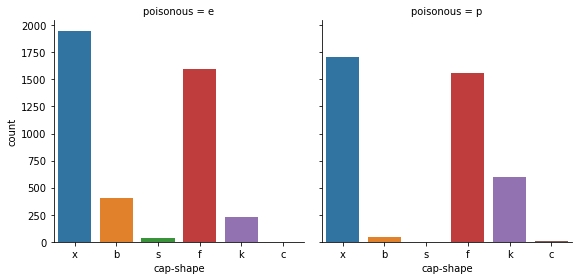

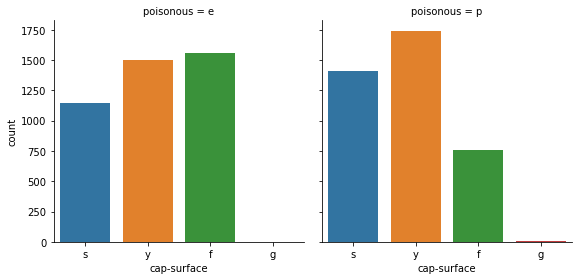

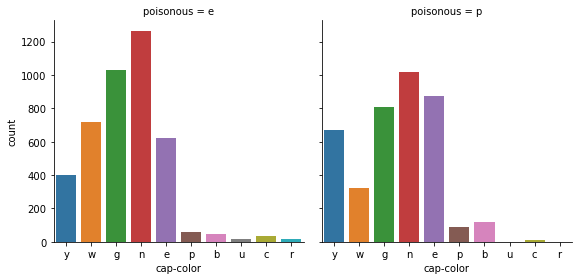

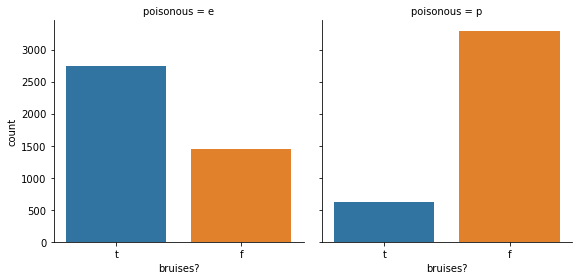

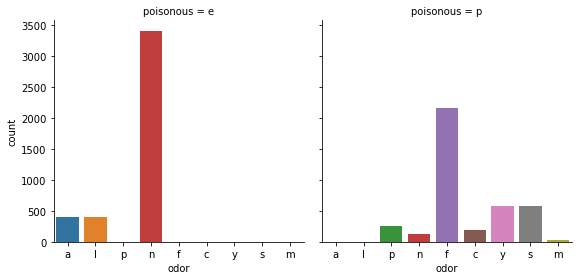

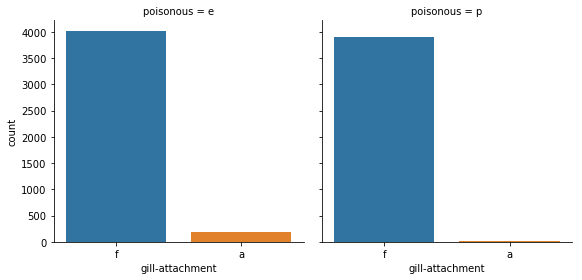

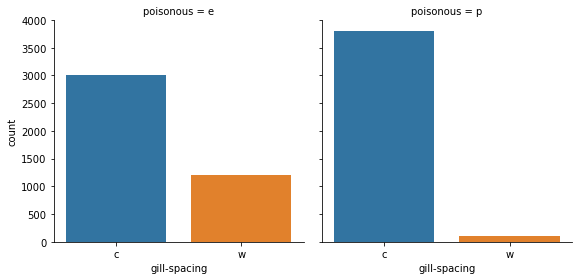

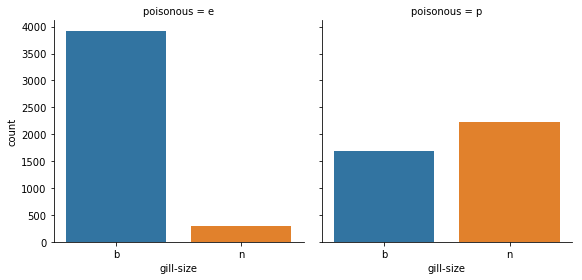

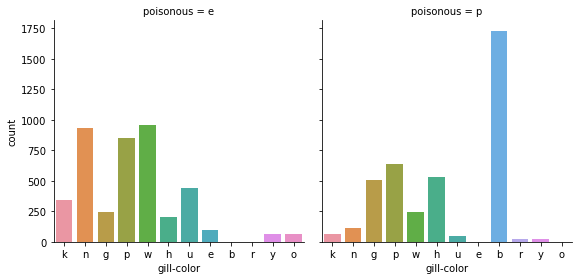

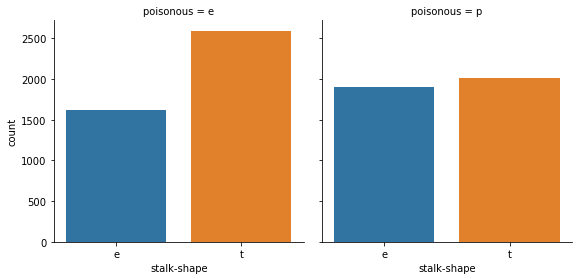

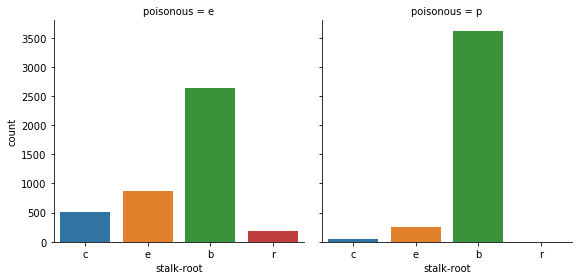

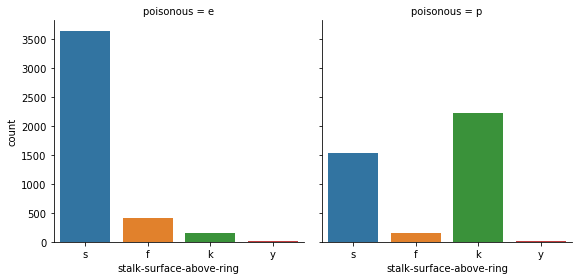

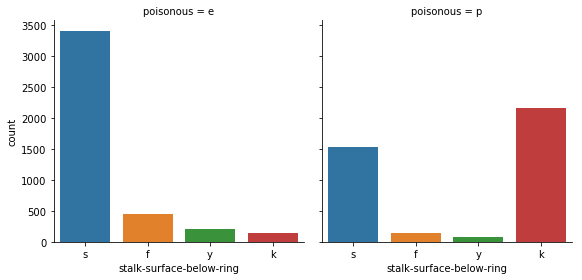

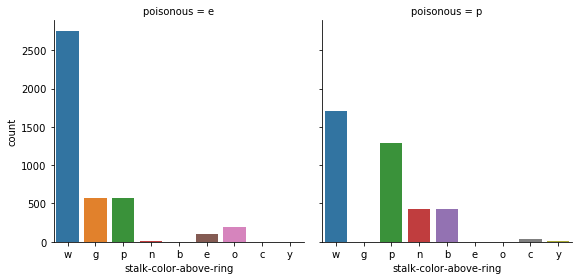

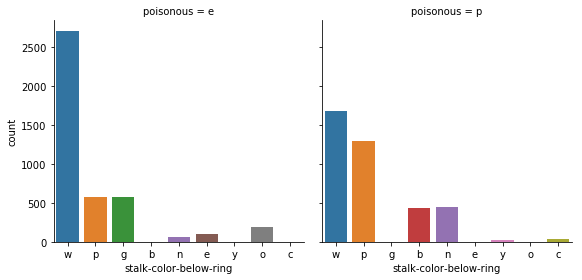

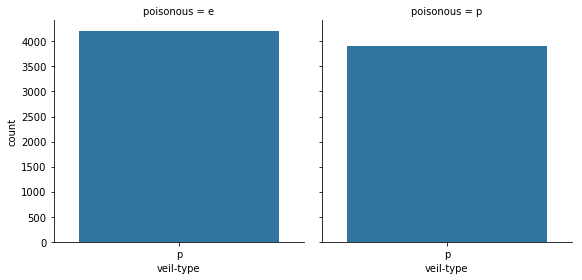

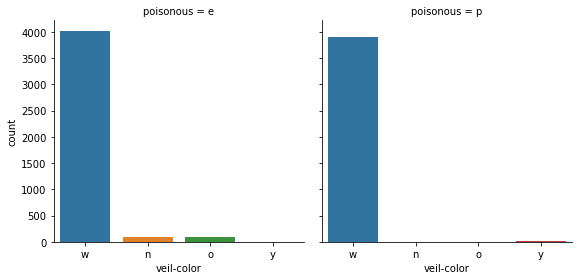

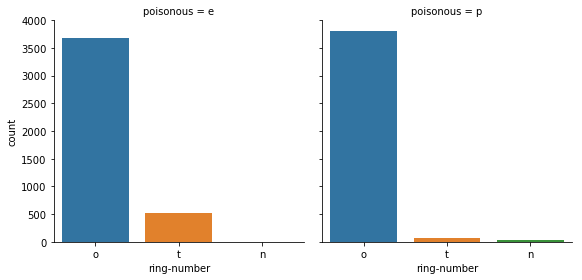

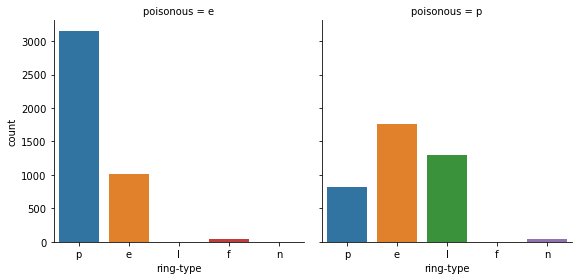

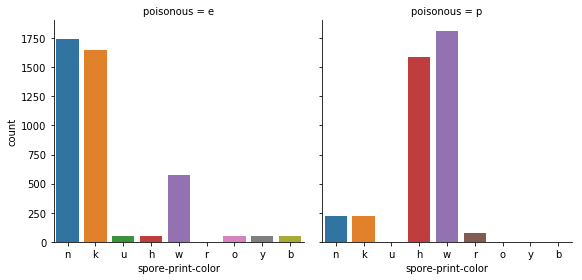

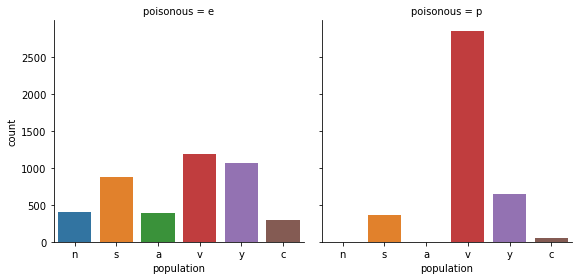

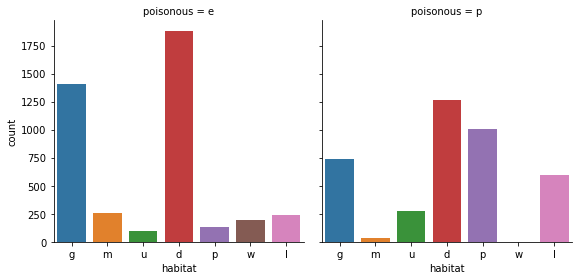

In [261]:
sns.factorplot(x="cap-shape", data=df, col="poisonous", kind="count")
#plt.savefig('capShape-toxicity_factorplot.png')
sns.factorplot(x="cap-surface", data=df, col="poisonous", kind="count")
#plt.savefig('capSurface-toxicity_factorplot.png')
sns.factorplot(x="cap-color", data=df, col="poisonous", kind="count")
#plt.savefig('capColor-toxicity_factorplot.png')
sns.factorplot(x="bruises?", data=df, col="poisonous", kind="count")
#plt.savefig('bruises-toxicity_factorplot.png')
sns.factorplot(x="odor", data=df, col="poisonous", kind="count")
#plt.savefig('odor-toxicity_factorplot.png')
sns.factorplot(x="gill-attachment", data=df, col="poisonous", kind="count")
#plt.savefig('gillAttachment-toxicity_factorplot.png')
sns.factorplot(x="gill-spacing", data=df, col="poisonous", kind="count")
#plt.savefig('gillSpacing-toxicity_factorplot.png')
sns.factorplot(x="gill-size", data=df, col="poisonous", kind="count")
#plt.savefig('gillSize-toxicity_factorplot.png')
sns.factorplot(x="gill-color", data=df, col="poisonous", kind="count")
#plt.savefig('gillColor-toxicity_factorplot.png')
sns.factorplot(x="stalk-shape", data=df, col="poisonous", kind="count")
#plt.savefig('stalkShape-toxicity_factorplot.png')
sns.factorplot(x="stalk-root", data=df, col="poisonous", kind="count")
#plt.savefig('stalkRoot-toxicity_factorplot.png')
sns.factorplot(x="stalk-surface-above-ring", data=df, col="poisonous", kind="count")
#plt.savefig('stalkSurfaceAboveRing-toxicity_factorplot.png')
sns.factorplot(x="stalk-surface-below-ring", data=df, col="poisonous", kind="count")
#plt.savefig('stalkSurfaceBelowRing-toxicity_factorplot.png')
sns.factorplot(x="stalk-color-above-ring", data=df, col="poisonous", kind="count")
#plt.savefig('stalkColorAboveRing-toxicity_factorplot.png')
sns.factorplot(x="stalk-color-below-ring", data=df, col="poisonous", kind="count")
#plt.savefig('stalkColorBelowRing-toxicity_factorplot.png')
sns.factorplot(x="veil-type", data=df, col="poisonous", kind="count")
#plt.savefig('veilType-toxicity_factorplot.png')
sns.factorplot(x="veil-color", data=df, col="poisonous", kind="count")
#plt.savefig('veilColor-toxicity_factorplot.png')
sns.factorplot(x="ring-number", data=df, col="poisonous", kind="count")
#plt.savefig('ringNumber-toxicity_factorplot.png')
sns.factorplot(x="ring-type", data=df, col="poisonous", kind="count")
#plt.savefig('ringType-toxicity_factorplot.png')
sns.factorplot(x="spore-print-color", data=df, col="poisonous", kind="count")
#plt.savefig('sporePrintColor-toxicity_factorplot.png')
sns.factorplot(x="population", data=df, col="poisonous", kind="count")
#plt.savefig('population-toxicity_factorplot.png')
sns.factorplot(x="habitat", data=df, col="poisonous", kind="count")
#plt.savefig('habitat-toxicity_factorplot.png')

plt.show()

In [262]:
df = pd.get_dummies(df)
df

,poisonous_e,poisonous_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
8,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [263]:
Y = df.iloc[:,0]
X = df.iloc[:,2:]

# splitting data into 70% training and 30% test data: 
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=2) # 0.3 means 30 pc of the data set to be test data

num_training = y_train.shape[0]
num_test = y_test.shape[0]
print('training: ' + str(num_training) + ', test: ' + str(num_test))

training: 5686, test: 2437


In [264]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test) 
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1: %.4f' % f1_score(y_test, y_pred))

Misclassified samples: 153 out of 2437
Accuracy: 0.9372
F1: 0.9436


In [265]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test) 
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1: %.4f' % f1_score(y_test, y_pred))

Misclassified samples: 115 out of 2437
Accuracy: 0.9528
F1: 0.9575


In [266]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test) 
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1: %.4f' % f1_score(y_test, y_pred))

Misclassified samples: 127 out of 2437
Accuracy: 0.9479
F1: 0.9487


In [267]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")

    plt.legend(loc="best")
    return plt

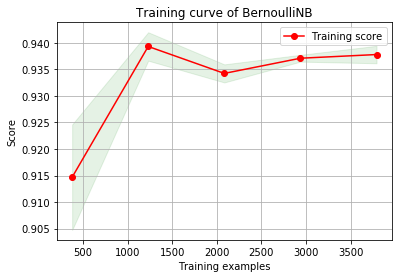

In [271]:
plot_learning_curve(bnb, "Training curve of BernoulliNB", X_train, y_train)
#plt.savefig('BNB_learning_curve.png')
plt.show()

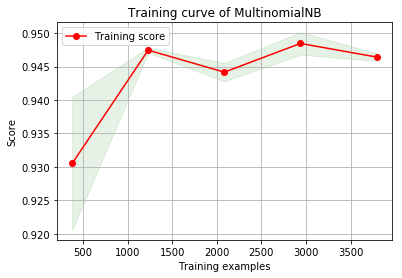

In [272]:
plot_learning_curve(mnb, "Training curve of MultinomialNB", X_train, y_train)
#plt.savefig('MNB_learning_curve.png')
plt.show()

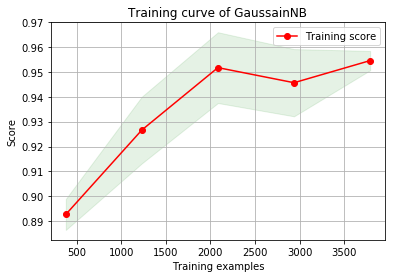

In [273]:
plot_learning_curve(gnb, "Training curve of GaussainNB", X_train, y_train)
#plt.savefig('GNB_learning_curve.png')
plt.show()